In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE=256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    'tomato-dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 5303 images belonging to 5 classes.


In [5]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_healthy': 4}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_healthy']

In [7]:
#import scipy
#for image_batch,label_batch in train_generator:
   # print(label_batch[0])
   # print(image_batch[0])

In [8]:
validation_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True
)
validation_generator = validation_datagen.flow_from_directory(
    'tomato-dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 756 images belonging to 5 classes.


In [9]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True
)
test_generator = test_datagen.flow_from_directory(
    'tomato-dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1520 images belonging to 5 classes.


Building the model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\vasan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353,317 (1.35 MB)

 Trainable params: 353,317 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
5303/32

165.71875

In [14]:
1253/32

39.15625

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=165,
    validation_data=validation_generator,
    verbose=1,
    epochs=50
)

Epoch 1/50


C:\Users\vasan\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.3027 - loss: 1.5299 - val_accuracy: 0.5899 - val_loss: 1.0711
Epoch 2/50
  1/165 ━━━━━━━━━━━━━━━━━━━━ 2:03 755ms/step - accuracy: 0.6562 - loss: 1.1604

C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.6562 - loss: 1.1604 - val_accuracy: 0.6495 - val_loss: 1.0301
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6746 - loss: 0.9134 - val_accuracy: 0.7566 - val_loss: 0.6378
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.8125 - loss: 0.5188 - val_accuracy: 0.7632 - val_loss: 0.6716
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.7625 - loss: 0.6159 - val_accuracy: 0.8426 - val_loss: 0.4136
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8750 - loss: 0.2928 - val_accuracy: 0.8426 - val_loss: 0.4082
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.8332 - loss: 0.4381 - val_accuracy: 0.8466 - val_loss: 0.4476
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.8438 - loss: 0.4988 - val_accuracy: 0.8439 - val_loss: 0.4482
Epoch 9/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8555 - loss: 0.4058 - val_accuracy:

In [16]:
scores = model.evaluate(test_generator)

48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 592ms/step - accuracy: 0.9447 - loss: 0.1982


first image to predict
actual label: Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
predicted label: Tomato_Late_blight


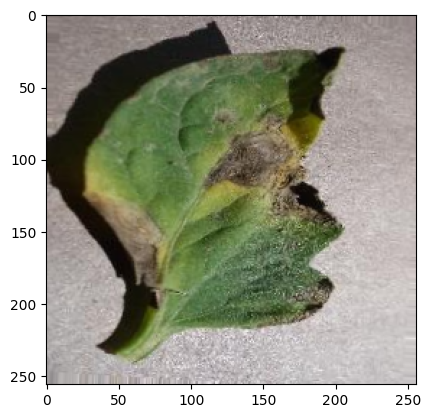

In [25]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [33]:
#model.save("86.keras")

In [26]:
model.save("95.keras")